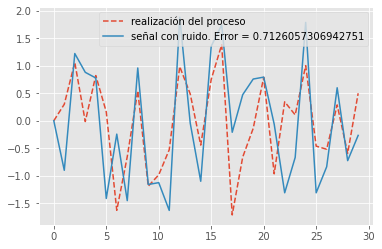

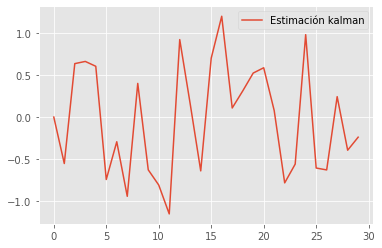

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

N = 30
a = 0.5
sigma_u = 1 #varianza del proceso

s = np.zeros(N)

#construir la señal
for n in np.arange(1, N):
    s[n] = a*s[n-1]+np.random.randn(1)*sigma_u
    
#generar la señal con ruido 
sigma_n = 0.7 #varianza del ruido
sr = np.zeros(N)
#agregar ruido
for n in np.arange(1,N):
    sr[n] = s[n]+np.random.randn(1)*sigma_n

error = ((sr-s)**2).mean()
    
plt.plot(s, '--', label = 'realización del proceso')
plt.plot(sr, label = 'señal con ruido. Error = '+ str(error))
plt.legend()
plt.show()

#Contrucción filtro de kalman
s_pred = 0
M = 0
s_hat = np.zeros(N)

#cada ciclo for, es como si llegara una muestra
for n in np.arange(N):
    #predicción?
    s_pred = a*s_pred
    error = sr[n]-s_pred #nueva muestra - predicción
    #predicción de minimo MSE
    M = a**2*M+sigma_u
    #calcular la ganancia de kalman
    K = M/(sigma_n+M)
    #calcular el estimador en base a la corrección de la predicción
    s_pred = s_pred + K*error 
    s_hat[n] = s_pred
    #actualiza la minimo MSE
    M = (1-K*M)

plt.plot(s_hat, label = 'Estimación kalman')
plt.legend()
plt.show()